# Práctica 05. Análisis exploratorio de datos

Nombre(s) Apellidos Angel Jesus Martinez Briones

Fecha 12 de diciembre del 2025

Realiza un análisis exploratorio de los datos que has elegido para tu proyecto integrador.

# Importacion y limpieza de datos

In [1]:
# Módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
# Cargamos los datos
df = pd.read_csv("Base70centros.csv")

In [3]:
# Verificamos cuantas observaciones tenemos y cuantas columas
df.shape

(31147, 1)

In [4]:
# Como solo hay una quise saber cuantas hay
df.columns

Index(['anio\tmes\ttipo_centro\tsubtipo_centro\tcentro\tcategoria\tcuartos_disponibles\tcuartos_ocupados_no_residentes\tcuartos_ocupados_residentes\tllegada_turistas_no_residentes\tllegada_turistas_residentes\tturistas_noche_no_residentes\tturistas_noche_residentes'], dtype='object')

In [5]:
# Estan unidas en una sola columna
df.head()

,anio\tmes\ttipo_centro\tsubtipo_centro\tcentro\tcategoria\tcuartos_disponibles\tcuartos_ocupados_no_residentes\tcuartos_ocupados_residentes\tllegada_turistas_no_residentes\tllegada_turistas_residentes\tturistas_noche_no_residentes\tturistas_noche_residentes
0,2016\t01\tCentros de Playa\tIntegralmente Plan...
1,2016\t01\tCentros de Playa\tIntegralmente Plan...
2,2016\t01\tCentros de Playa\tIntegralmente Plan...
3,2016\t01\tCentros de Playa\tIntegralmente Plan...
4,2016\t01\tCentros de Playa\tIntegralmente Plan...


In [6]:
#sSelecciono la coluna
columna_unica = df.iloc[:, 0]

In [7]:
#Separamos las palabras de la columna
df_final = columna_unica.str.split("\t", expand=True)

In [8]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2016,01,Centros de Playa,Integralmente Planeados,Ixtapa - Zihuatanejo,3 estrellas,10819,5333,2421,3888,2023,10116,5175
1,2016,01,Centros de Playa,Integralmente Planeados,Ixtapa - Zihuatanejo,4 estrellas,45090,8114,29303,3941,21399,15301,63565
2,2016,01,Centros de Playa,Integralmente Planeados,Ixtapa - Zihuatanejo,5 estrellas,105015,32190,47030,12240,44790,64356,109299
3,2016,01,Centros de Playa,Integralmente Planeados,Bahías de Huatulco,2 estrellas,5549,0,2571,0,4816,0,6320
4,2016,01,Centros de Playa,Integralmente Planeados,Bahías de Huatulco,3 estrellas,12896,0,4360,0,8560,0,11464


In [9]:
# Agregamos los encabezados que se eliminaron
encabezados = ['anio', 'mes', 'tipo_centro', 'subtipo_centro', 'centro', 'categoria', 'cuartos_disponibles',
               'cuartos_ocupados_no_residentes', 'cuartos_ocupados_residentes', 'llegada_turistas_no_residentes',
               'llegada_turistas_residentes', 'turistas_noche_no_residentes', 'turistas_noche_residentes']

df_final.columns = encabezados

In [10]:
# listo ya estan bien separadas 
df_final.head()

,anio,mes,tipo_centro,subtipo_centro,centro,categoria,cuartos_disponibles,cuartos_ocupados_no_residentes,cuartos_ocupados_residentes,llegada_turistas_no_residentes,llegada_turistas_residentes,turistas_noche_no_residentes,turistas_noche_residentes
0,2016,01,Centros de Playa,Integralmente Planeados,Ixtapa - Zihuatanejo,3 estrellas,10819,5333,2421,3888,2023,10116,5175
1,2016,01,Centros de Playa,Integralmente Planeados,Ixtapa - Zihuatanejo,4 estrellas,45090,8114,29303,3941,21399,15301,63565
2,2016,01,Centros de Playa,Integralmente Planeados,Ixtapa - Zihuatanejo,5 estrellas,105015,32190,47030,12240,44790,64356,109299
3,2016,01,Centros de Playa,Integralmente Planeados,Bahías de Huatulco,2 estrellas,5549,0,2571,0,4816,0,6320
4,2016,01,Centros de Playa,Integralmente Planeados,Bahías de Huatulco,3 estrellas,12896,0,4360,0,8560,0,11464


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31147 entries, 0 to 31146
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   anio                            31147 non-null  object
 1   mes                             31147 non-null  object
 2   tipo_centro                     31147 non-null  object
 3   subtipo_centro                  31147 non-null  object
 4   centro                          31147 non-null  object
 5   categoria                       31147 non-null  object
 6   cuartos_disponibles             31147 non-null  object
 7   cuartos_ocupados_no_residentes  31147 non-null  object
 8   cuartos_ocupados_residentes     31147 non-null  object
 9   llegada_turistas_no_residentes  31147 non-null  object
 10  llegada_turistas_residentes     31147 non-null  object
 11  turistas_noche_no_residentes    31147 non-null  object
 12  turistas_noche_residentes       31147 non-null

In [12]:
print("\n años: \n",df_final['anio'].unique())


 años: 
 ['2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' '2024']


In [51]:
# Cambiamos de tipo a las columnas que son numericas
columnas_numericas = ['cuartos_disponibles','cuartos_ocupados_no_residentes','cuartos_ocupados_residentes','llegada_turistas_no_residentes',
    'llegada_turistas_residentes','turistas_noche_no_residentes','turistas_noche_residentes']

df_final[columnas_numericas] = df_final[columnas_numericas].apply(pd.to_numeric, errors="coerce")

# Unificamos una sola columa tipo fecha a la columna anio y mes 
df_final['fecha'] = pd.to_datetime(dict(year=df_final['anio'], month=df_final['mes'], day=1))
df_final.drop(columns=['anio', 'mes'], inplace=True)


In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31147 entries, 0 to 31146
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tipo_centro                     31147 non-null  object        
 1   subtipo_centro                  31147 non-null  object        
 2   centro                          31147 non-null  object        
 3   categoria                       31147 non-null  object        
 4   cuartos_disponibles             31147 non-null  int64         
 5   cuartos_ocupados_no_residentes  31147 non-null  int64         
 6   cuartos_ocupados_residentes     31147 non-null  int64         
 7   llegada_turistas_no_residentes  31147 non-null  int64         
 8   llegada_turistas_residentes     31147 non-null  int64         
 9   turistas_noche_no_residentes    31147 non-null  int64         
 10  turistas_noche_residentes       31146 non-null  float64       
 11  fe

In [53]:
# Verificamos si hay espacios nulos
f_final.isna().sum()

tipo_centro                       0
subtipo_centro                    0
centro                            0
categoria                         0
cuartos_disponibles               0
cuartos_ocupados_no_residentes    0
cuartos_ocupados_residentes       0
llegada_turistas_no_residentes    0
llegada_turistas_residentes       0
turistas_noche_no_residentes      0
turistas_noche_residentes         1
fecha                             0
dtype: int64

In [54]:
# Eliminamos espacios nulos y volvemos a verificar
df_final = df_final.dropna()
df_final.isna().sum()

tipo_centro                       0
subtipo_centro                    0
centro                            0
categoria                         0
cuartos_disponibles               0
cuartos_ocupados_no_residentes    0
cuartos_ocupados_residentes       0
llegada_turistas_no_residentes    0
llegada_turistas_residentes       0
turistas_noche_no_residentes      0
turistas_noche_residentes         0
fecha                             0
dtype: int64

# Medidas Descriptivas

In [56]:
# Me gustaria saber cuatos grupos pueden hacerse por categoria cualitativa asi que imprimo para ver su contenido
print("\n Tipo de Centro: \n",df_final['tipo_centro'].unique())
print("\n Sub Tipo de Centro: \n",df_final['subtipo_centro'].unique())
print("\n Centro: \n",df_final['centro'].unique())
print("\n Categorias: \n",df_final['categoria'].unique())



 Tipo de Centro: 
 ['Centros de Playa' 'Ciudades']

 Sub Tipo de Centro: 
 ['Integralmente Planeados' 'Otros' 'Tradicionales' 'Grandes' 'Interior'
 'Fronterizas']

 Centro: 
 ['Ixtapa - Zihuatanejo' 'Bahías de Huatulco' 'Cancún' 'Loreto' 'Los Cabos'
 'Isla Mujeres' 'Nuevo Nayarit' 'Playas de Rosarito' 'Puerto Escondido'
 'Riviera Maya' 'San Felipe' 'Tonalá Puerto Arista' 'Acapulco' 'Cozumel'
 'La Paz' 'Manzanillo' 'Mazatlán' 'Veracruz-Boca del Río'
 'Puerto Vallarta' 'Ciudad de México' 'Guadalajara' 'Monterrey'
 'Aguascalientes' 'Campeche' 'Celaya' 'Chihuahua' 'Coatzacoalcos' 'Colima'
 'Comitán de Domínguez' 'Culiacán' 'Durango' 'El Fuerte' 'Guanajuato'
 'Hermosillo' 'Irapuato' 'León' 'Los Mochis' 'Mérida' 'Morelia' 'Oaxaca'
 'Pachuca' 'Palenque' 'Puebla' 'Querétaro' 'Salamanca'
 'San Cristóbal de las Casas' 'San Juan de los Lagos' 'San Juan del Río'
 'San Luis Potosí' 'San Miguel de Allende' 'Taxco' 'Tequisquiapan'
 'Tlaxcala' 'Toluca' 'Tuxtla Gutiérrez' 'Valle de Bravo' 'Villahermos

In [57]:
# Vamos a aplicar un describe para poder ver unas breves medidas descriptivas
df_final.describe()

,cuartos_disponibles,cuartos_ocupados_no_residentes,cuartos_ocupados_residentes,llegada_turistas_no_residentes,llegada_turistas_residentes,turistas_noche_no_residentes,turistas_noche_residentes,fecha
count,3.114600e+04,3.114600e+04,31146.000000,31146.000000,31146.000000,3.114600e+04,3.114600e+04,31146
mean,4.367056e+04,9.343579e+03,14162.060232,5687.892892,16092.265492,2.082957e+04,2.896731e+04,2020-05-26 18:46:12.644962560
min,8.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2016-01-01 00:00:00
25%,7.560000e+03,0.000000e+00,1744.000000,0.000000,2503.000000,0.000000e+00,3.424000e+03,2018-03-01 00:00:00
50%,1.592800e+04,2.735000e+02,4823.000000,285.000000,6450.000000,4.820000e+02,9.146000e+03,2020-05-01 00:00:00
75%,3.806800e+04,2.154000e+03,13503.000000,2023.000000,16576.500000,3.977750e+03,2.611400e+04,2022-09-01 00:00:00
max,1.317790e+06,1.107395e+06,294189.000000,542220.000000,373532.000000,2.444202e+06,1.004741e+06,2024-12-01 00:00:00
std,1.006751e+05,5.735170e+04,27376.033527,28028.730036,29199.800061,1.329950e+05,5.806651e+04,NaN


In [58]:
df_final.describe(include='object')

,tipo_centro,subtipo_centro,centro,categoria
count,31146,31146,31146,31146
unique,2,6,64,6
top,Ciudades,Interior,Valle de Bravo,3 estrellas
freq,21977,18370,552,6868


In [63]:
def coef_variation(x):
    return np.std(x, ddof=1) / np.mean(x)
    
def asim(x):
    """Calcula la asimetría (skewness) ignorando valores NaN."""
    return skew(x, nan_policy='omit')

def curt(x):
    """Calcula la curtosis (kurtosis) ignorando valores NaN."""
    return kurtosis(x, nan_policy='omit')

In [64]:
summary_funcs = [
    ('n', 'count'),
    ('media', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('25%', lambda x: x.quantile(0.25)),
    ('50%', 'median'),
    ('75%', lambda x: x.quantile(0.75)),
    ('max', 'max'),
    ('asim', asim),
    ('curt', curt),
    ('cv', coef_variation)
]
summary_centro = df_final.groupby('centro', observed=False)['llegada_turistas_no_residentes'].agg(summary_funcs)

In [65]:
summary_centro

,n,media,std,min,25%,50%,75%,max,asim,curt,cv
centro,,,,,,,,,,,
Acapulco,494,1935.459514,3064.167526,0,0.0,46.0,3088.50,15137,1.800661,2.830144,1.583173
Aguascalientes,540,1461.379630,1655.660475,0,0.0,1216.0,2116.00,10445,1.824641,4.249962,1.132943
Bahías de Huatulco,432,1203.622685,1960.624600,0,0.0,55.5,1655.25,9338,2.060656,3.756607,1.628936
Campeche,527,1195.743833,1654.342380,0,0.0,355.0,1894.00,7379,1.622542,1.949591,1.383526
Cancún,539,80362.515770,126536.171304,0,851.0,20820.0,82609.50,542220,1.779812,1.986198,1.574567
...,...,...,...,...,...,...,...,...,...,...,...
Valle de Bravo,552,139.920290,485.328453,0,0.0,0.0,0.00,3853,4.445077,20.957524,3.468607
Veracruz-Boca del Río,539,1578.942486,3071.750388,0,0.0,11.0,1151.50,15832,2.292915,4.788030,1.945448
Villahermosa,540,837.824074,954.982190,0,0.0,564.5,1366.50,5106,1.453375,2.533115,1.139836


In [67]:
# Valores atípicos

def val_atipicos(df):
    col_num = df.select_dtypes(include='number').columns

    Q = df[col_num].quantile([0.25, 0.75])
    Q1 = Q.loc[0.25]
    Q3 = Q.loc[0.75]

    IQR = Q3 - Q1

    return ((df[col_num] < (Q1 - 1.5 * IQR)) |
            (df[col_num] > (Q3 + 1.5 * IQR))).sum()


val_atipicos(df_final)

cuartos_disponibles               3440
cuartos_ocupados_no_residentes    4480
cuartos_ocupados_residentes       3625
llegada_turistas_no_residentes    4689
llegada_turistas_residentes       3165
turistas_noche_no_residentes      4554
turistas_noche_residentes         3612
dtype: int64

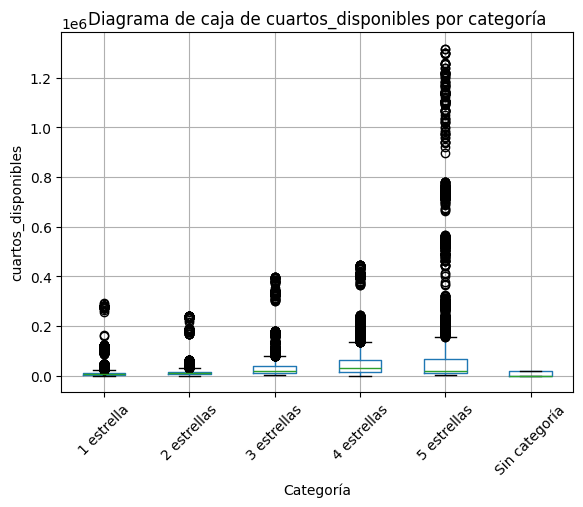

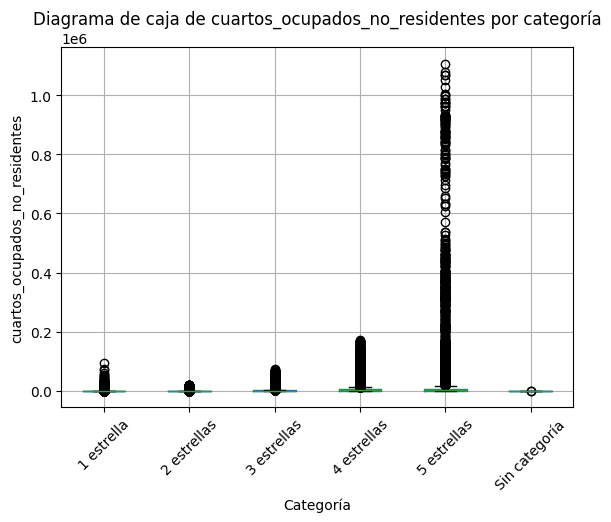

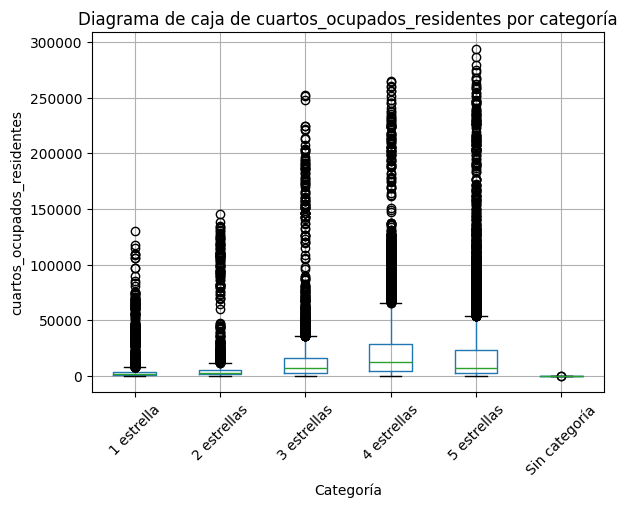

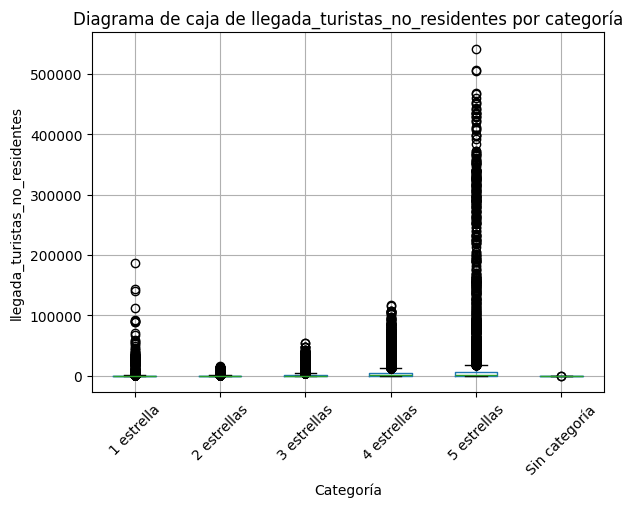

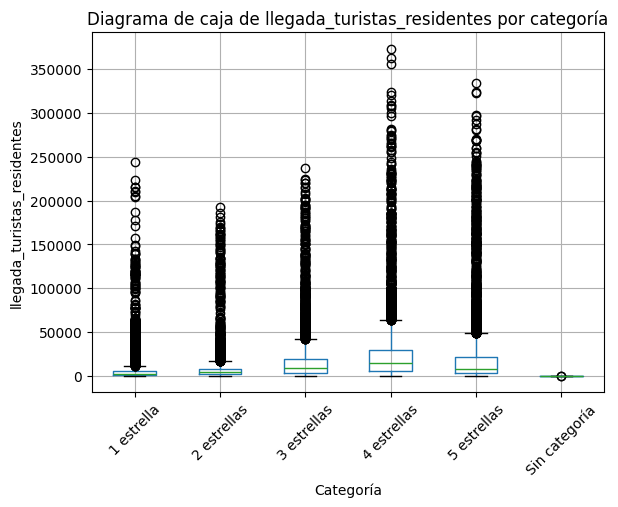

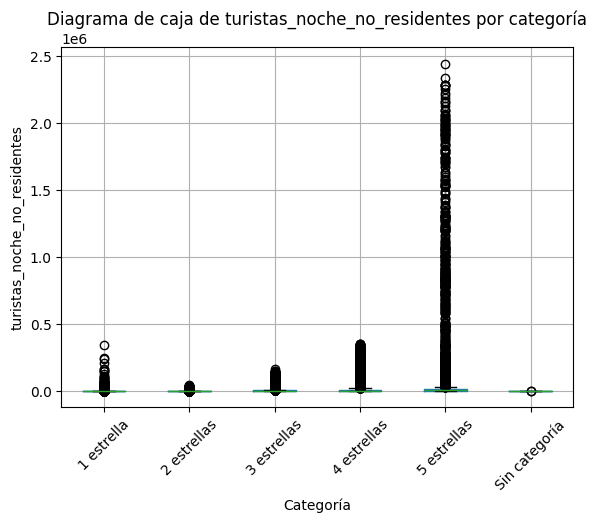

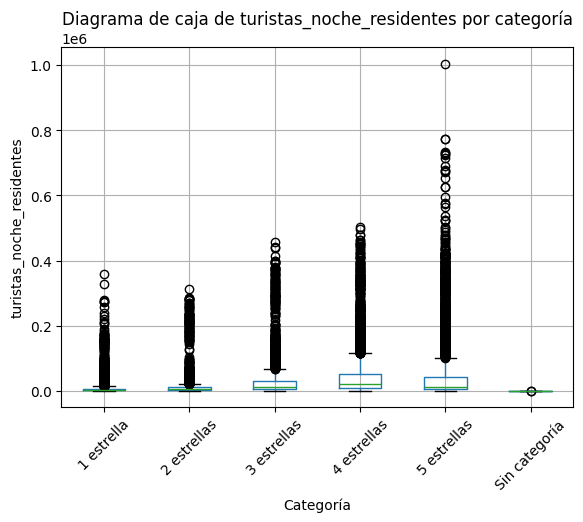

In [73]:
columnas_numericas = ['cuartos_disponibles','cuartos_ocupados_no_residentes','cuartos_ocupados_residentes','llegada_turistas_no_residentes',
    'llegada_turistas_residentes','turistas_noche_no_residentes','turistas_noche_residentes']


for var in columnas_numericas:
    df_final.boxplot(column=var, by='categoria')
    plt.title(f'Diagrama de caja de {var} por categoría')
    plt.suptitle('')
    plt.xlabel('Categoría')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.show()

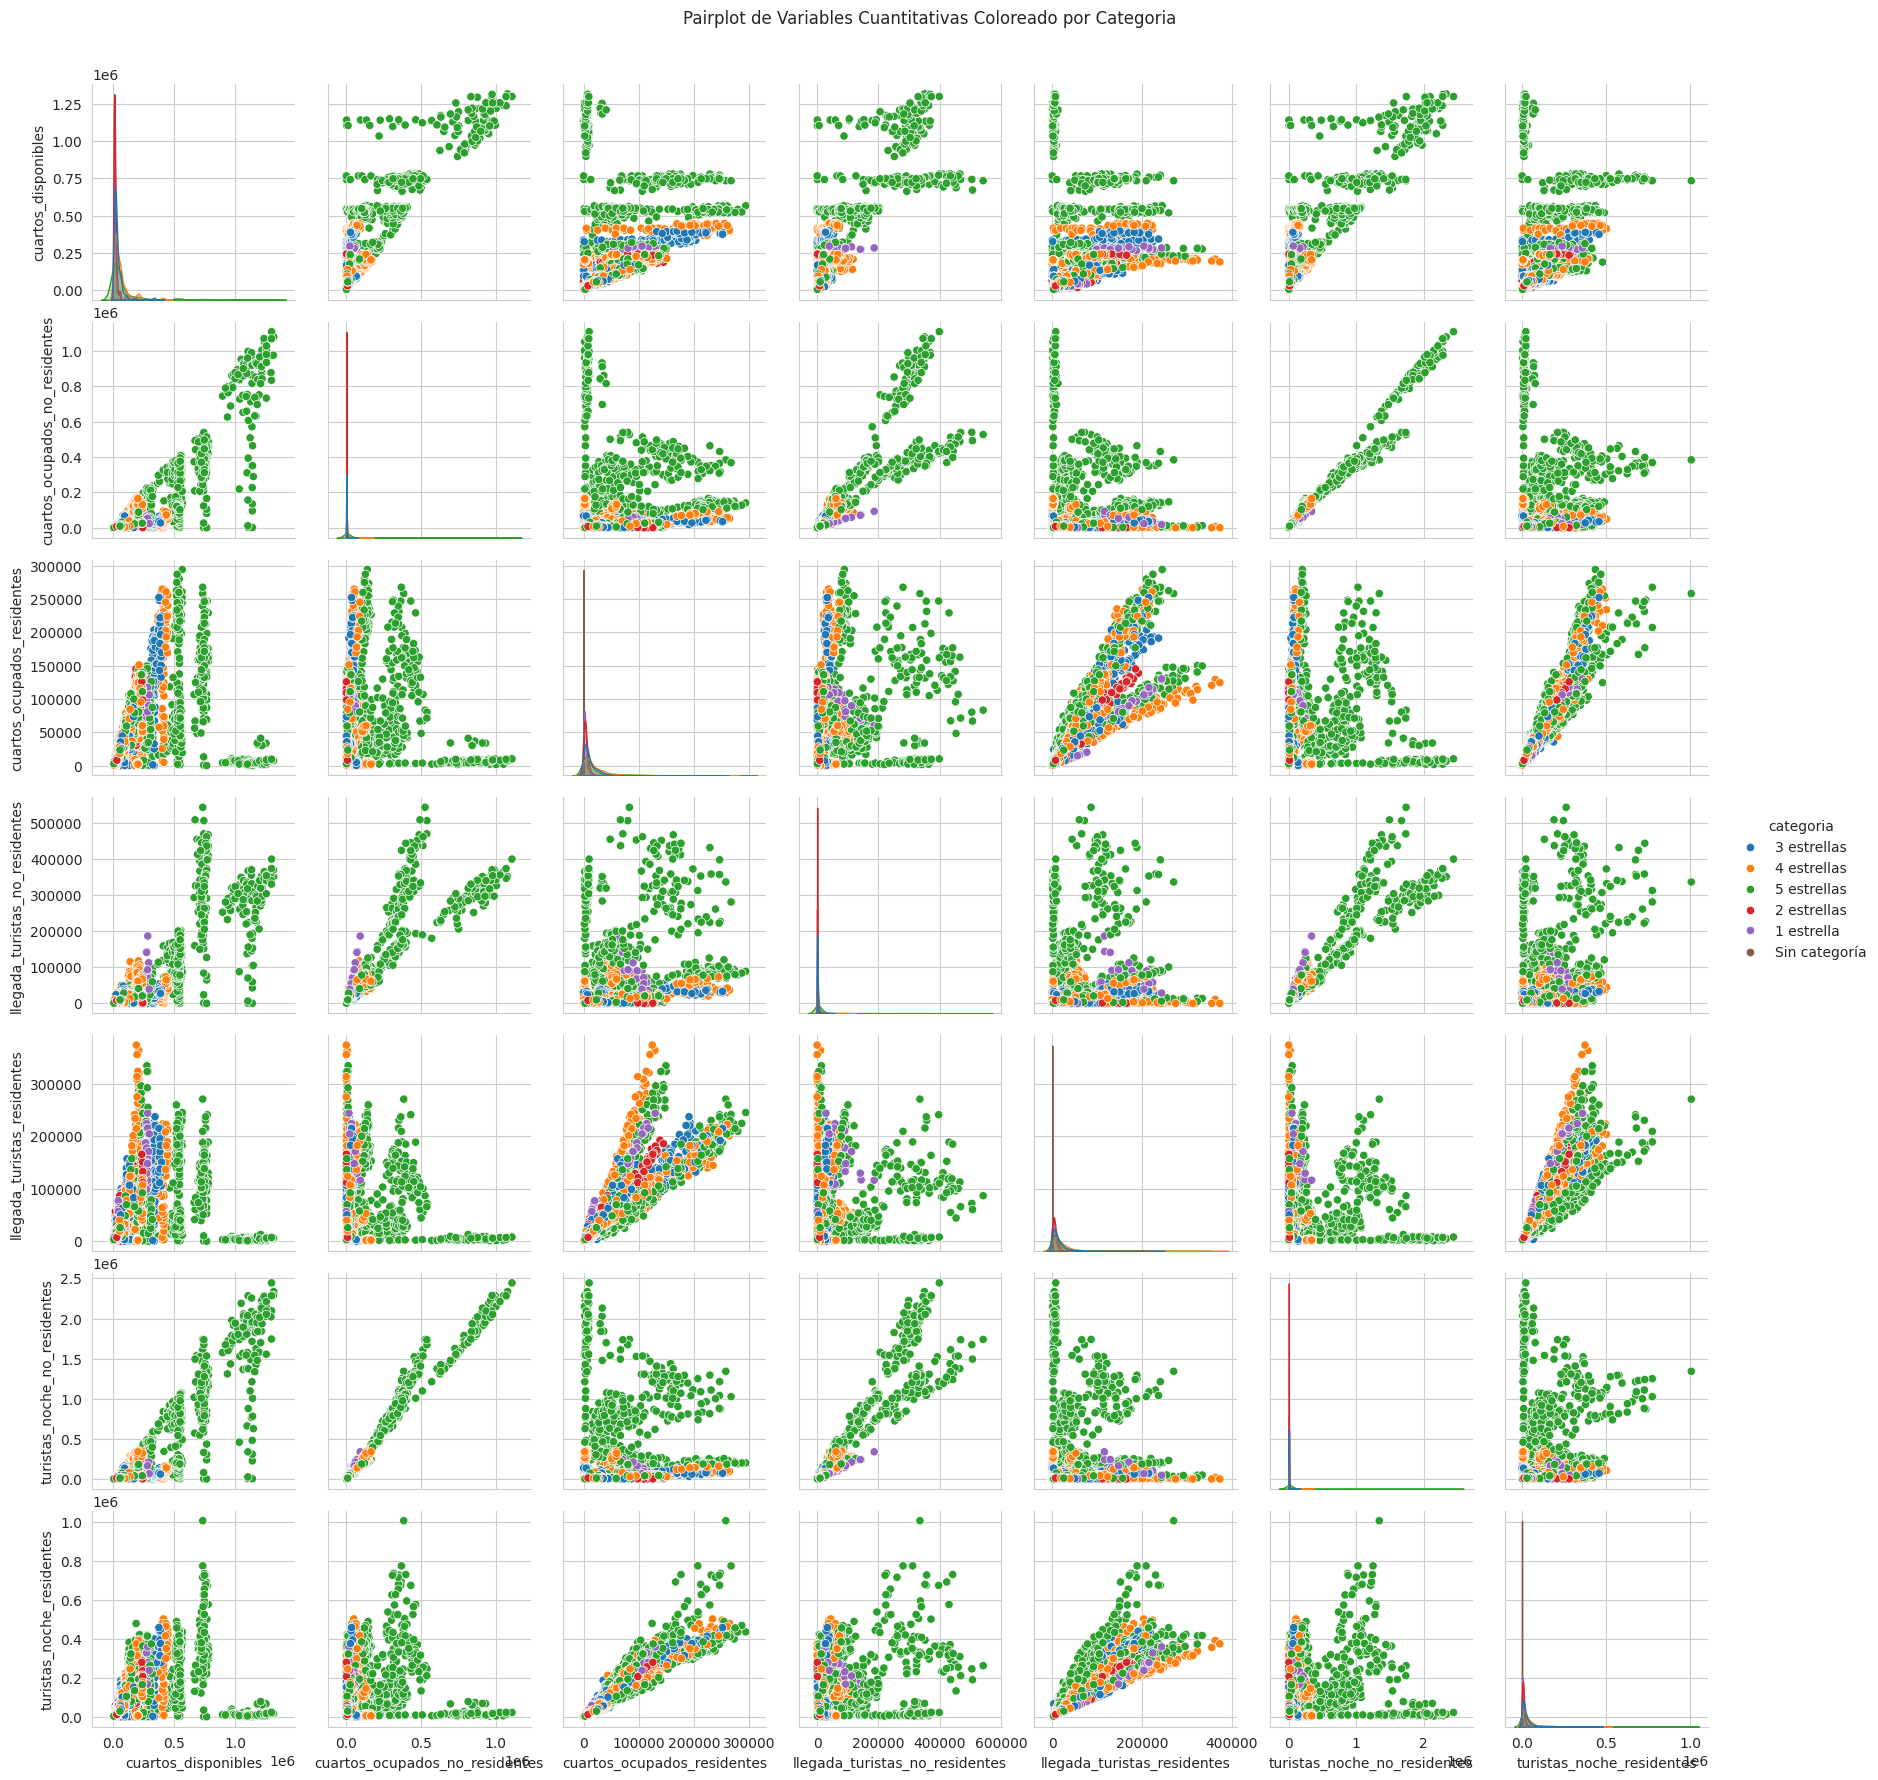

In [76]:
sns.set_style("whitegrid")
 
sns.pairplot(df_final,vars=columnas_numericas, hue='categoria', kind='scatter')

plt.suptitle("Pairplot de Variables Cuantitativas Coloreado por Categoria", y=1.02)
plt.show()

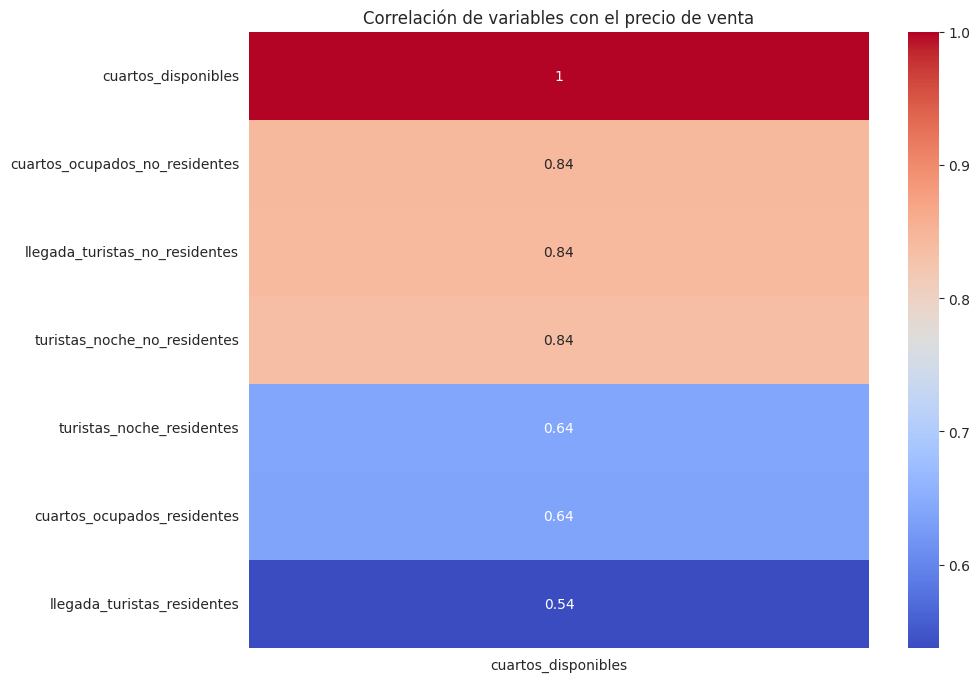

In [80]:
# Correlación
columnas_numericas_df= df_final[columnas_numericas]
corr = columnas_numericas_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr[['cuartos_disponibles']].sort_values(by='cuartos_disponibles', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlación de variables con el precio de venta")
plt.show()